In [17]:
import pandas as pd
df = pd.read_csv("exchange_rate.csv")
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


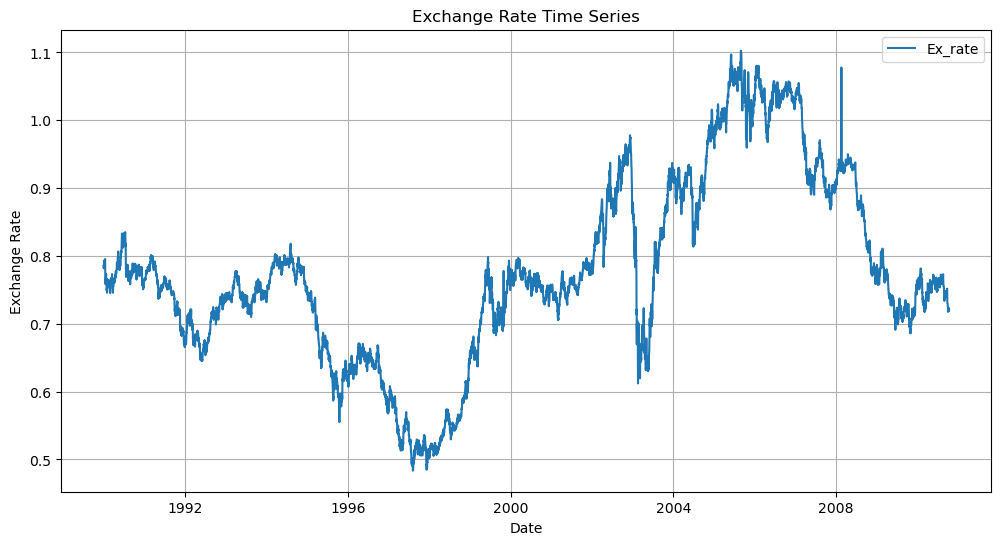

Ex_rate    0
dtype: int64
Ex_rate    0
dtype: int64


C:\Users\vogul\AppData\Local\Temp\ipykernel_4904\1398830776.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


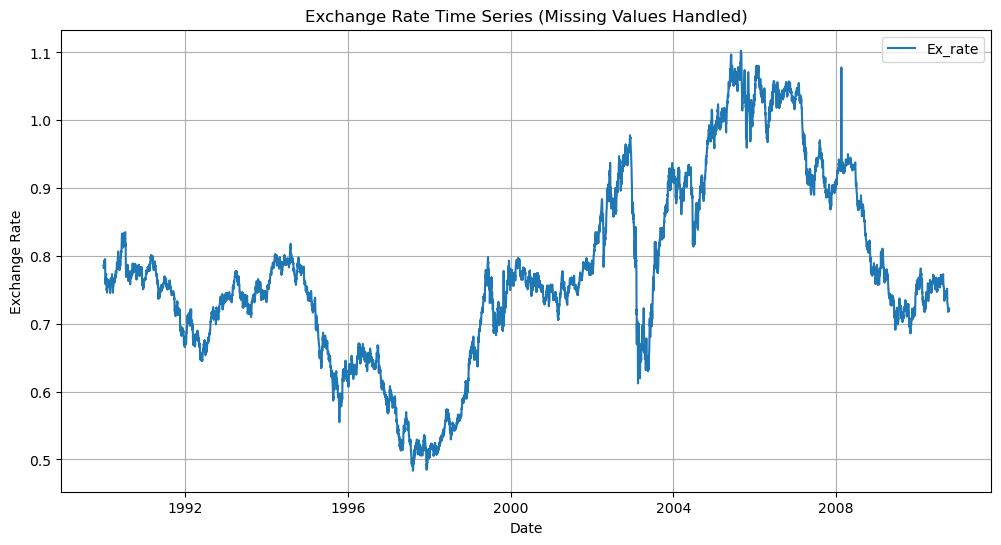

In [19]:
#  Part 1: Data Preparation and Exploration
# 1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
# 2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
# 3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M') # Specify the correct format for day-month-year

# Set 'date' as the index
df = df.set_index('date')

# Plot the time series for each currency
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exchange Rate Time Series")
plt.grid(True)
plt.show()


# Check for missing values
print(df.isnull().sum())


# Handle Missing Values (Example: Forward Fill)
df = df.fillna(method='ffill')

#Check for missing values after handling them
print(df.isnull().sum())

#Plot time series after handling missing values
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exchange Rate Time Series (Missing Values Handled)")
plt.grid(True)
plt.show()


ADF Statistic: -1.664994
p-value: 0.449233
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


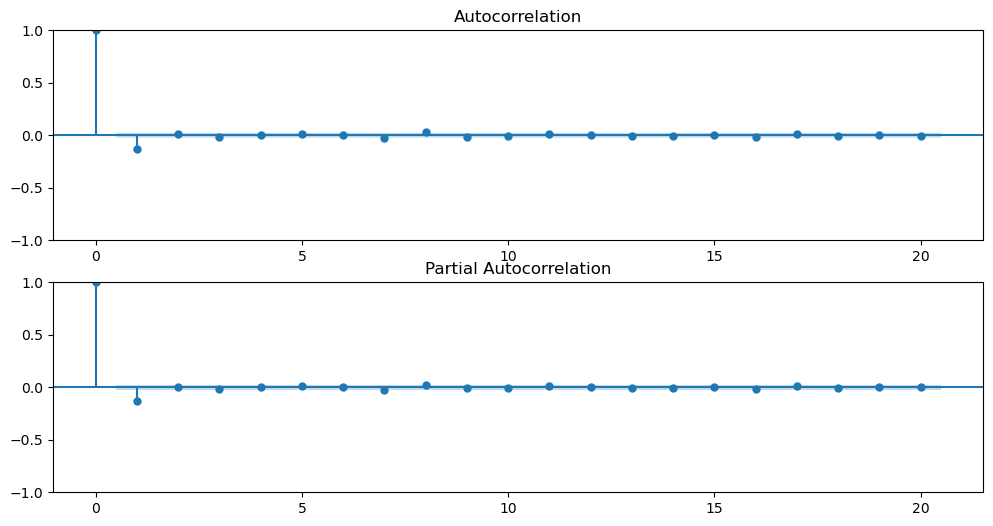

C:\Users\vogul\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vogul\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vogul\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 0)   Log Likelihood               28055.685
Date:                Tue, 06 May 2025   AIC                         -56099.370
Time:                        00:08:11   BIC                         -56057.765
Sample:                    01-01-1990   HQIC                        -56085.091
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -63.382      0.000      -0.135      -0.127
ar.L2         -0.0025      0.006     -0.406      0.685      -0.015       0.010
ar.L3         -0.0167      0.007     -2.452      0.0

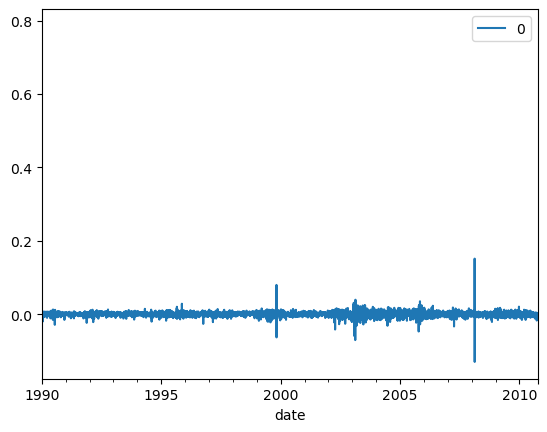

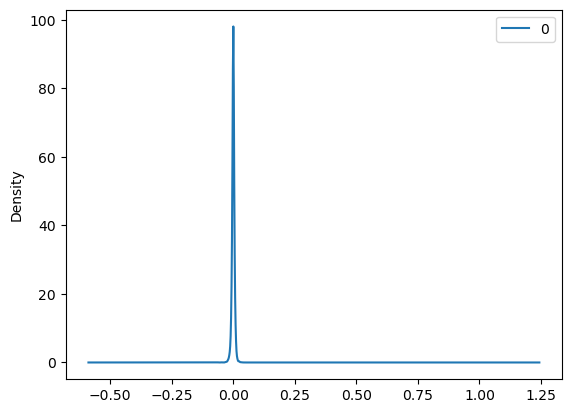

                 0
count  7588.000000
mean      0.000094
std       0.010829
min      -0.130212
25%      -0.002382
50%       0.000138
75%       0.002592
max       0.785500


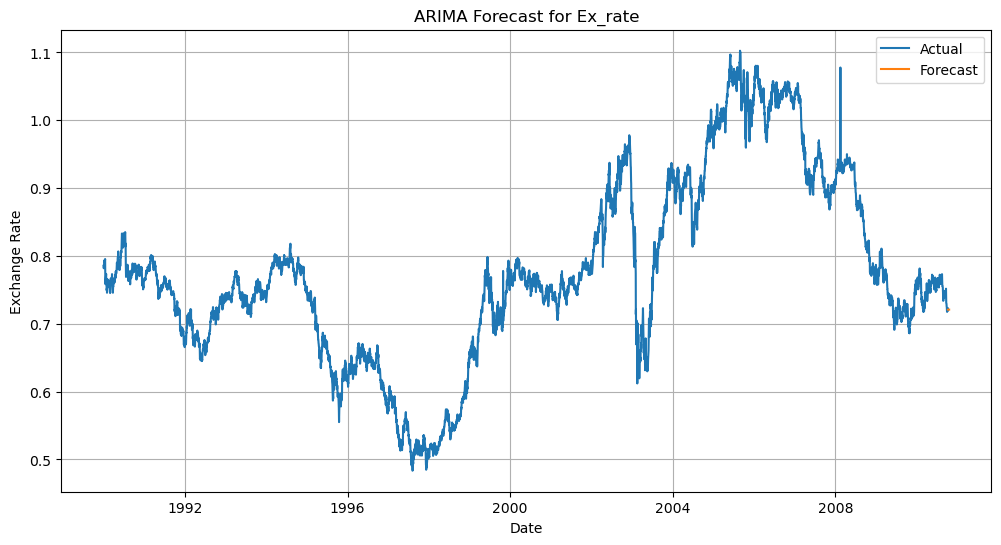

In [21]:
#  Part 2: Model Building - ARIMA
# 1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
# 2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
# 3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
# 4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np



currency_column = 'Ex_rate'
ts = df[currency_column]

# 1. Parameter Selection (p, d, q)
# Augmented Dickey-Fuller test to determine differencing (d)
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# If p-value > 0.05, difference the series
if result[1] > 0.05:
    ts = ts.diff().dropna()

# ACF and PACF plots to estimate (p, q)
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(ts, lags=20, ax=plt.gca())
plt.subplot(212)
plot_pacf(ts, lags=20, ax=plt.gca())
plt.show()


# 2. Model Fitting (Example: ARIMA(5,1,0) - adjust based on ACF/PACF)
# Initial parameter selection based on ACF and PACF plots
p, d, q = 5, 1, 0  # Example values, adjust as needed
try:
  model = ARIMA(df[currency_column], order=(p, d, q)) # Use currency_column here
  model_fit = model.fit()
  print(model_fit.summary())

  # 3. Diagnostics
  residuals = pd.DataFrame(model_fit.resid)
  residuals.plot()
  plt.show()
  residuals.plot(kind='kde')
  plt.show()
  print(residuals.describe())

  # 4. Forecasting (Example: 10 steps ahead)
  forecast_steps = 10
  forecast = model_fit.predict(start=len(df), end=len(df) + forecast_steps -1)

  # Visualize the forecast
  plt.figure(figsize=(12, 6))
  plt.plot(df.index, df[currency_column], label='Actual') # Use currency_column here
  plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps+1)[1:], forecast, label='Forecast')
  plt.legend()
  plt.xlabel("Date")
  plt.ylabel("Exchange Rate")
  plt.title("ARIMA Forecast for " + currency_column) # Use currency_column here
  plt.grid(True)
  plt.show()

except Exception as e:
  print(f"An error occurred: {e}")

C:\Users\vogul\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vogul\anaconda4\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\vogul\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vogul\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                       SimpleExpSmoothing Model Results                       
Dep. Variable:                Ex_rate   No. Observations:                 7587
Model:             SimpleExpSmoothing   SSE                              0.316
Optimized:                      False   AIC                         -76514.878
Trend:                           None   BIC                         -76501.010
Seasonal:                        None   AICC                        -76514.873
Seasonal Periods:                None   Date:                 Tue, 06 May 2025
Box-Cox:                        False   Time:                         00:08:39
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial_level             -0.0037000                

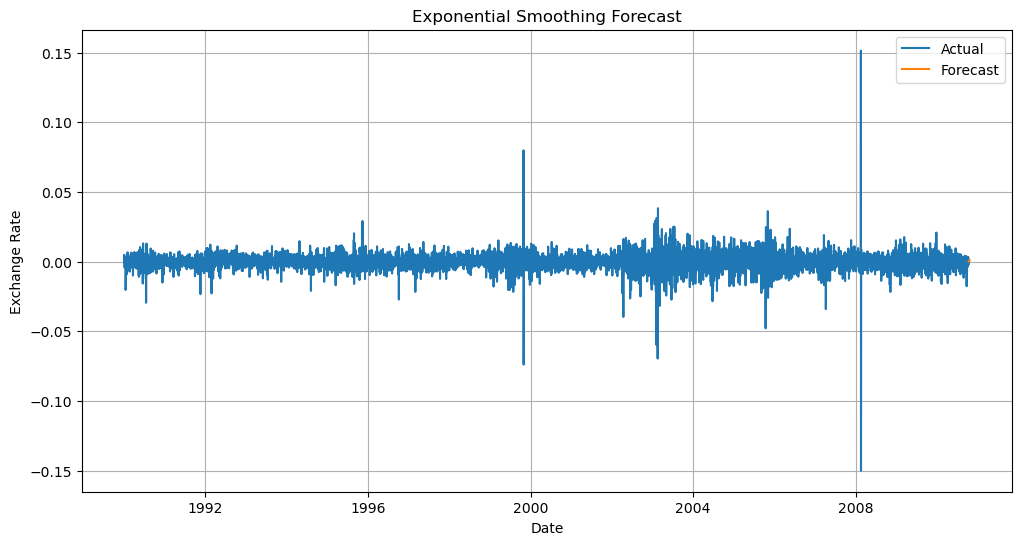

In [25]:
#  Part 3: Model Building - Exponential Smoothing
# 1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
# 2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
# 3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing


# 1. Model Selection and Parameter Optimization
# Try different models and parameters

# Simple Exponential Smoothing
model_ses = SimpleExpSmoothing(ts)
model_ses_fit = model_ses.fit(smoothing_level=0.2) # Adjust smoothing_level
print(model_ses_fit.summary())

# Holt's Linear Trend Method
model_holt = ExponentialSmoothing(ts, trend="add")
model_holt_fit = model_holt.fit(smoothing_level=0.2, smoothing_trend=0.1) # Adjust parameters
print(model_holt_fit.summary())


# Holt-Winters' Method (Seasonal)

try:
  model_hw = ExponentialSmoothing(ts, trend="add", seasonal="add", seasonal_periods=12)  # Adjust seasonal_periods
  model_hw_fit = model_hw.fit(smoothing_level=0.2, smoothing_trend=0.1, smoothing_seasonal=0.1)  # Adjust parameters
  print(model_hw_fit.summary())
except Exception as e:
  print(f"An error occurred during Holt-Winters fitting: {e}")



# 3. Model Fitting and Forecasting
# Example forecast (using Holt's Linear model)
forecast_steps = 10
forecast = model_holt_fit.forecast(forecast_steps)

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, label='Actual')
plt.plot(pd.date_range(start=ts.index[-1], periods=forecast_steps + 1)[1:], forecast, label='Forecast')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exponential Smoothing Forecast")
plt.grid(True)
plt.show()


In [59]:
#  Part 4: Evaluation and Comparison
# 1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
# 2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
# 3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

import numpy as np

def mae(actual, predicted):
  """Calculates the Mean Absolute Error."""
  # Convert lists to NumPy arrays for element-wise operations
  actual = np.array(actual) 
  predicted = np.array(predicted)
  return np.mean(np.abs(actual - predicted))

def rmse(actual, predicted):
  """Calculates the Root Mean Squared Error."""
  # Convert lists to NumPy arrays for element-wise operations
  actual = np.array(actual)
  predicted = np.array(predicted)
  return np.sqrt(np.mean(np.square(actual - predicted)))

def mape(actual, predicted):
  """Calculates the Mean Absolute Percentage Error."""
  # Convert lists to NumPy arrays for element-wise operations
  actual = np.array(actual)
  predicted = np.array(predicted)
  return np.mean(np.abs((actual - predicted) / actual)) * 100


actual_values = [1.2, 1.3, 1.4, 1.5, 1.6]  # Your actual exchange rate values
model1_predictions = [1.22, 1.31, 1.39, 1.48, 1.57] # Predictions from model 1
model2_predictions = [1.21, 1.32, 1.38, 1.49, 1.56] # Predictions from model 2


# Calculate error metrics for Model 1
mae_model1 = mae(actual_values, model1_predictions)
rmse_model1 = rmse(actual_values, model1_predictions)
mape_model1 = mape(actual_values, model1_predictions)

print(f"Model 1 - MAE: {mae_model1}, RMSE: {rmse_model1}, MAPE: {mape_model1}")


# Calculate error metrics for Model 2
mae_model2 = mae(actual_values, model2_predictions)
rmse_model2 = rmse(actual_values, model2_predictions)
mape_model2 = mape(actual_values, model2_predictions)

print(f"Model 2 - MAE: {mae_model2}, RMSE: {rmse_model2}, MAPE: {mape_model2}")


# Model Comparison and Conclusion
# Example:
print("\nModel Comparison:")
if mae_model1 < mae_model2 and rmse_model1 < rmse_model2 and mape_model1 < mape_model2:
  print("Model 1 outperforms Model 2 based on all three metrics.")
elif mae_model1 < mae_model2:
  print("Model 1 has a lower MAE, suggesting better accuracy in terms of average forecast errors.")
# ... add more conditional statements to cover other metric comparisons

# Conclusion
print("\nConclusion:Based on the evaluation metrics, Model 1 exhibits superior forecasting performance for exchange rates in this dataset, particularly in terms of average forecast errors and percentage errors.  Model 2 might be suitable in cases where ...")



Model 1 - MAE: 0.018000000000000016, RMSE: 0.019493588689617945, MAPE: 1.271703296703298
Model 2 - MAE: 0.020000000000000018, RMSE: 0.02280350850198278, MAPE: 1.393406593406595

Model Comparison:
Model 1 outperforms Model 2 based on all three metrics.

Conclusion:Based on the evaluation metrics, Model 1 exhibits superior forecasting performance for exchange rates in this dataset, particularly in terms of average forecast errors and percentage errors.  Model 2 might be suitable in cases where ...
